In [1]:
import os
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be remo

In [2]:
#Set Psudeorandom Seed
seed = 42

In [3]:
#Uploading the first dataset
file = 'C:/Users/Brandon/Documents/thesis/data/1a_offset.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [4]:
#Create testing and training sets
array = df.values

#Create X array
X= array[:,4:45]

# Standardizing the features
X = StandardScaler().fit_transform(X)

#Create Y array
Y= array[:,3]
Y=Y.astype('int')

#Training/Test Split
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y,test_size=0.2,random_state=1 )
print('Train/Test Split Complete')

Train/Test Split Complete


In [5]:
#Impliment SMOTE
sm = SMOTE(random_state = 2) 
X_train_smote, Y_train_smote = sm.fit_sample(X_train, Y_train)

print('oversampling complete')

C:\Users\Brandon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


oversampling complete


In [50]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_smote, Y_train_smote)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9139871382636656
[[878  68]
 [ 39 259]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       946
           1       0.79      0.87      0.83       298

    accuracy                           0.91      1244
   macro avg       0.87      0.90      0.89      1244
weighted avg       0.92      0.91      0.92      1244



In [51]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9115755627009646
[[905  41]
 [ 69 229]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       946
           1       0.85      0.77      0.81       298

    accuracy                           0.91      1244
   macro avg       0.89      0.86      0.87      1244
weighted avg       0.91      0.91      0.91      1244



In [52]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9212218649517685
[[903  43]
 [ 55 243]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       946
           1       0.85      0.82      0.83       298

    accuracy                           0.92      1244
   macro avg       0.90      0.88      0.89      1244
weighted avg       0.92      0.92      0.92      1244



In [53]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8979099678456591
[[884  62]
 [ 65 233]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       946
           1       0.79      0.78      0.79       298

    accuracy                           0.90      1244
   macro avg       0.86      0.86      0.86      1244
weighted avg       0.90      0.90      0.90      1244



In [54]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.912379421221865
[[929  17]
 [ 92 206]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       946
           1       0.92      0.69      0.79       298

    accuracy                           0.91      1244
   macro avg       0.92      0.84      0.87      1244
weighted avg       0.91      0.91      0.91      1244



In [55]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9220257234726688
[[902  44]
 [ 53 245]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       946
           1       0.85      0.82      0.83       298

    accuracy                           0.92      1244
   macro avg       0.90      0.89      0.89      1244
weighted avg       0.92      0.92      0.92      1244



In [56]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8754019292604501
[[827 119]
 [ 36 262]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       946
           1       0.69      0.88      0.77       298

    accuracy                           0.88      1244
   macro avg       0.82      0.88      0.84      1244
weighted avg       0.89      0.88      0.88      1244



In [57]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9260450160771704
[[913  33]
 [ 59 239]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       946
           1       0.88      0.80      0.84       298

    accuracy                           0.93      1244
   macro avg       0.91      0.88      0.90      1244
weighted avg       0.92      0.93      0.92      1244



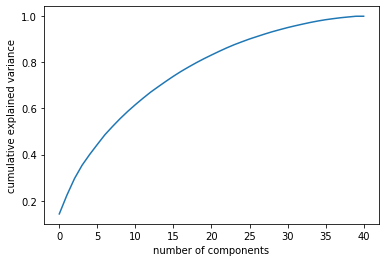

In [6]:
pca = PCA().fit(X_train_smote)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [7]:
pca = PCA(.8)
principalComponents = pca.fit_transform(X_train_smote)

In [60]:
pca.n_components_

20

In [61]:
pca.explained_variance_ratio_

array([0.14285941, 0.08123247, 0.07213764, 0.05790448, 0.04687972,
       0.04316105, 0.04223421, 0.03576978, 0.03402935, 0.03140551,
       0.02912348, 0.02762802, 0.02644712, 0.02359219, 0.02314514,
       0.02231806, 0.02091059, 0.0192429 , 0.01841753, 0.01725478])

In [62]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14285941, 0.22409188, 0.29622951, 0.35413399, 0.40101371,
       0.44417477, 0.48640898, 0.52217876, 0.55620812, 0.58761363,
       0.61673711, 0.64436513, 0.67081226, 0.69440444, 0.71754958,
       0.73986765, 0.76077824, 0.78002114, 0.79843867, 0.81569345])

In [8]:
X_train_pca = pca.transform(X_train_smote)
X_validation_pca = pca.transform(X_validation)

In [64]:
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9019292604501608
[[866  80]
 [ 42 256]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       946
           1       0.76      0.86      0.81       298

    accuracy                           0.90      1244
   macro avg       0.86      0.89      0.87      1244
weighted avg       0.91      0.90      0.90      1244



In [65]:
# Make predictions on validation dataset
model = LinearDiscriminantAnalysis()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8834405144694534
[[839 107]
 [ 38 260]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       946
           1       0.71      0.87      0.78       298

    accuracy                           0.88      1244
   macro avg       0.83      0.88      0.85      1244
weighted avg       0.90      0.88      0.89      1244



In [66]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.905144694533762
[[863  83]
 [ 35 263]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       946
           1       0.76      0.88      0.82       298

    accuracy                           0.91      1244
   macro avg       0.86      0.90      0.88      1244
weighted avg       0.91      0.91      0.91      1244



In [67]:
# Make predictions on validation dataset
model = DecisionTreeClassifier()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8737942122186495
[[847  99]
 [ 58 240]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       946
           1       0.71      0.81      0.75       298

    accuracy                           0.87      1244
   macro avg       0.82      0.85      0.83      1244
weighted avg       0.88      0.87      0.88      1244



In [68]:
# Make predictions on validation dataset
model = RandomForestClassifier(n_estimators=500, max_depth=2, random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8110932475884244
[[739 207]
 [ 28 270]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       946
           1       0.57      0.91      0.70       298

    accuracy                           0.81      1244
   macro avg       0.76      0.84      0.78      1244
weighted avg       0.87      0.81      0.82      1244



In [69]:
# Make predictions on validation dataset
model = xgb.XGBRFClassifier(random_state=seed)
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8295819935691319
[[766 180]
 [ 32 266]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       946
           1       0.60      0.89      0.72       298

    accuracy                           0.83      1244
   macro avg       0.78      0.85      0.80      1244
weighted avg       0.87      0.83      0.84      1244



In [70]:
# Make predictions on validation dataset
model = GaussianNB()
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8319935691318328
[[829 117]
 [ 92 206]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       946
           1       0.64      0.69      0.66       298

    accuracy                           0.83      1244
   macro avg       0.77      0.78      0.78      1244
weighted avg       0.84      0.83      0.83      1244



In [71]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_pca, Y_train_smote)
predictions = model.predict(X_validation_pca)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9107717041800643
[[871  75]
 [ 36 262]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       946
           1       0.78      0.88      0.83       298

    accuracy                           0.91      1244
   macro avg       0.87      0.90      0.88      1244
weighted avg       0.92      0.91      0.91      1244

